In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 6.9 MB/s 
     |████████████████████████████████| 9.5 MB 42.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import os

In [ ]:
raw_csv_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SCPh4_005930.csv',sep=',')

df_comp = raw_csv_data.copy()

df_comp

,Date,Open,High,Low,Close,Volume
0,2019-07-18 13:31,46000,46100,46000,46100,17515
1,2019-07-18 13:32,46100,46100,46050,46050,3888
2,2019-07-18 13:33,46100,46100,46050,46100,2703
3,2019-07-18 13:34,46050,46100,46050,46050,14405
4,2019-07-18 13:35,46050,46100,46050,46100,3568
...,...,...,...,...,...,...
188140,2021-07-16 15:17,79600,79700,79600,79700,24989
188141,2021-07-16 15:18,79700,79700,79600,79700,41225
188142,2021-07-16 15:19,79600,79700,79600,79700,29508
188143,2021-07-16 15:20,79700,79700,79600,79700,230917


In [ ]:
df_comp.Date.describe()

count               188145
unique              188145
top       2020-08-10 15:08
freq                     1
Name: Date, dtype: object

In [ ]:
# Date가 더 이상 텍스트가 아닌 실제 시간으로 저장된다.

df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)

df_comp.head()

,Date,Open,High,Low,Close,Volume
0,2019-07-18 13:31:00,46000,46100,46000,46100,17515
1,2019-07-18 13:32:00,46100,46100,46050,46050,3888
2,2019-07-18 13:33:00,46100,46100,46050,46100,2703
3,2019-07-18 13:34:00,46050,46100,46050,46050,14405
4,2019-07-18 13:35:00,46050,46100,46050,46100,3568


In [ ]:
df_comp.Date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  188145
unique                 188145
top       2020-07-03 13:08:00
freq                        1
first     2019-07-18 13:31:00
last      2021-07-16 15:30:00
Name: Date, dtype: object

In [ ]:
df_comp.set_index('Date', inplace=True)

df_comp.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-18 13:31:00,46000,46100,46000,46100,17515
2019-07-18 13:32:00,46100,46100,46050,46050,3888
2019-07-18 13:33:00,46100,46100,46050,46100,2703
2019-07-18 13:34:00,46050,46100,46050,46050,14405
2019-07-18 13:35:00,46050,46100,46050,46100,3568


In [ ]:
#business day(휴일을 제외한 평일)을 기준으로 시계열 데이터를 만든다 

df_comp = df_comp.asfreq('t')

df_comp.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-18 13:31:00,46000.0,46100.0,46000.0,46100.0,17515.0
2019-07-18 13:32:00,46100.0,46100.0,46050.0,46050.0,3888.0
2019-07-18 13:33:00,46100.0,46100.0,46050.0,46100.0,2703.0
2019-07-18 13:34:00,46050.0,46100.0,46050.0,46050.0,14405.0
2019-07-18 13:35:00,46050.0,46100.0,46050.0,46100.0,3568.0


In [ ]:
# isna()는 누락된 데이터가 있는지 여부에 따라 집합의 모든 항목에 대해 'True'와 'False'가 표시된다.

df_comp.isna()

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-18 13:31:00,False,False,False,False,False
2019-07-18 13:32:00,False,False,False,False,False
2019-07-18 13:33:00,False,False,False,False,False
2019-07-18 13:34:00,False,False,False,False,False
2019-07-18 13:35:00,False,False,False,False,False
...,...,...,...,...,...
2021-07-16 15:26:00,True,True,True,True,True
2021-07-16 15:27:00,True,True,True,True,True
2021-07-16 15:28:00,True,True,True,True,True


In [ ]:
#누락된 요소를 바로 직전 데이터의 값을 가져와서 채운다

df_comp.isna().sum()

Open      861735
High      861735
Low       861735
Close     861735
Volume    861735
dtype: int64

In [ ]:
df_comp=df_comp.fillna(method='ffill')

df_comp.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df_comp

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-18 13:31:00,46000.0,46100.0,46000.0,46100.0,17515.0
2019-07-18 13:32:00,46100.0,46100.0,46050.0,46050.0,3888.0
2019-07-18 13:33:00,46100.0,46100.0,46050.0,46100.0,2703.0
2019-07-18 13:34:00,46050.0,46100.0,46050.0,46050.0,14405.0
2019-07-18 13:35:00,46050.0,46100.0,46050.0,46100.0,3568.0
...,...,...,...,...,...
2021-07-16 15:26:00,79700.0,79700.0,79600.0,79700.0,230917.0
2021-07-16 15:27:00,79700.0,79700.0,79600.0,79700.0,230917.0
2021-07-16 15:28:00,79700.0,79700.0,79600.0,79700.0,230917.0


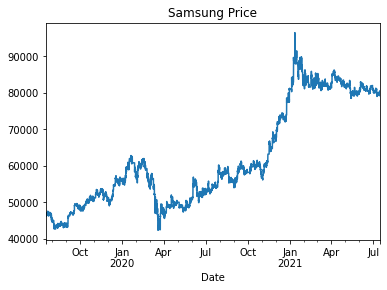

In [ ]:
## Plotting
df_comp.Close.plot(title = "Samsung Price")

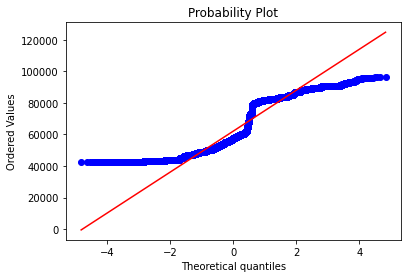

In [ ]:
scipy.stats.probplot(df_comp.Close, plot = plt)
plt.show()

In [ ]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1049880 entries, 2019-07-18 13:31:00 to 2021-07-16 15:30:00
Freq: T
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Open    1049880 non-null  float64
 1   High    1049880 non-null  float64
 2   Low     1049880 non-null  float64
 3   Close   1049880 non-null  float64
 4   Volume  1049880 non-null  float64
dtypes: float64(5)
memory usage: 48.1 MB


In [ ]:
# reset_index()를 쓰면 인덱스를 보통의 자료열로 바꿀 수도 있다. 데이터 프레임의 인덱스는 정수로 된 디폴트 인덱스로 바뀐다.

df_pre=df_comp.reset_index()

df_pre

,Date,Open,High,Low,Close,Volume
0,2019-07-18 13:31:00,46000.0,46100.0,46000.0,46100.0,17515.0
1,2019-07-18 13:32:00,46100.0,46100.0,46050.0,46050.0,3888.0
2,2019-07-18 13:33:00,46100.0,46100.0,46050.0,46100.0,2703.0
3,2019-07-18 13:34:00,46050.0,46100.0,46050.0,46050.0,14405.0
4,2019-07-18 13:35:00,46050.0,46100.0,46050.0,46100.0,3568.0
...,...,...,...,...,...,...
1049875,2021-07-16 15:26:00,79700.0,79700.0,79600.0,79700.0,230917.0
1049876,2021-07-16 15:27:00,79700.0,79700.0,79600.0,79700.0,230917.0
1049877,2021-07-16 15:28:00,79700.0,79700.0,79600.0,79700.0,230917.0
1049878,2021-07-16 15:29:00,79700.0,79700.0,79600.0,79700.0,230917.0


In [ ]:
#일단 데이터타임인덱스를 없애는데 성공했고, 
#인포머처럼 바꾸려면 date를 object로, float64를 int64로 변형시켜주어야 한다.

df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049880 entries, 0 to 1049879
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1049880 non-null  datetime64[ns]
 1   Open    1049880 non-null  float64       
 2   High    1049880 non-null  float64       
 3   Low     1049880 non-null  float64       
 4   Close   1049880 non-null  float64       
 5   Volume  1049880 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 48.1 MB


In [ ]:
#datetime64를 object로 변환시킨다.

from datetime import datetime
def convert_datetime(dt):
    return datetime.strftime(dt, '%Y-%m-%d %H:%M-%S')

df_pre['Date']= df_pre['Date'].apply(convert_datetime)

df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049880 entries, 0 to 1049879
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Date    1049880 non-null  object 
 1   Open    1049880 non-null  float64
 2   High    1049880 non-null  float64
 3   Low     1049880 non-null  float64
 4   Close   1049880 non-null  float64
 5   Volume  1049880 non-null  float64
dtypes: float64(5), object(1)
memory usage: 48.1+ MB


In [ ]:
# open, high, low, close, volume을 int64로 변환시켜주어야 한다.

df_pre[['Open','High','Low','Close','Volume']]=df_pre[['Open','High','Low','Close','Volume']].astype('int64')

df_pre

,Date,Open,High,Low,Close,Volume
0,2019-07-18 13:31-00,46000,46100,46000,46100,17515
1,2019-07-18 13:32-00,46100,46100,46050,46050,3888
2,2019-07-18 13:33-00,46100,46100,46050,46100,2703
3,2019-07-18 13:34-00,46050,46100,46050,46050,14405
4,2019-07-18 13:35-00,46050,46100,46050,46100,3568
...,...,...,...,...,...,...
1049875,2021-07-16 15:26-00,79700,79700,79600,79700,230917
1049876,2021-07-16 15:27-00,79700,79700,79600,79700,230917
1049877,2021-07-16 15:28-00,79700,79700,79600,79700,230917
1049878,2021-07-16 15:29-00,79700,79700,79600,79700,230917


In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049880 entries, 0 to 1049879
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Date    1049880 non-null  object
 1   Open    1049880 non-null  int64 
 2   High    1049880 non-null  int64 
 3   Low     1049880 non-null  int64 
 4   Close   1049880 non-null  int64 
 5   Volume  1049880 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 48.1+ MB


In [ ]:
df_pre.to_csv('/content/drive/MyDrive/Colab Notebooks/bETTm2.csv')

In [ ]:
!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/Muiiya/research.git
!ls

Cloning into 'Informer2020'...
remote: Enumerating objects: 525, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 525 (delta 1), reused 3 (delta 1), pack-reused 517
Receiving objects: 100% (525/525), 6.47 MiB | 10.01 MiB/s, done.
Resolving deltas: 100% (298/298), done.
Cloning into 'research'...
remote: Enumerating objects: 501, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 501 (delta 2), reused 0 (delta 0), pack-reused 491
Receiving objects: 100% (501/501), 66.61 MiB | 29.04 MiB/s, done.
Resolving deltas: 100% (184/184), done.
drive  Informer2020  research  sample_data


In [ ]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

In [ ]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import os

In [ ]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'ETTm2' # data
args.root_path = '/content/drive/MyDrive/Colab Notebooks/' # root path of data file
args.data_path = 'ETTm2.csv' # data file
args.features = 'MS' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'Close' # target feature in S or MS task
args.freq = 't' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 96 # input sequence length of Informer encoder
args.label_len = 48 # start token length of Informer decoder
args.pred_len = 24 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 5 # encoder input size
args.dec_in = 5 # decoder input size
args.c_out = 1 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 't'

args.batch_size = 16 # 배치사이즈
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 50 # 에포크 수
args.patience = 50  # early stopping 횟수
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'

In [ ]:
setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_{}_{}'\
          .format(args.model, args.data, args.features, args.seq_len, args.label_len, args.pred_len, 
                  args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, 
                  args.attn, args.factor, args.embed, args.distil, args.des, "electr1day")

exp = Exp_Informer(args)

Use GPU: cuda:0


In [ ]:
print('>>>>>>>Initiating model training : {}>>>>>>>>>>>>>>>>>>>'.format(setting))
exp.train(setting)

print('>>>>>>>Initiating model testing : {}<<<<<<<<<<<<<<<<<'.format(setting))
exp.test(setting)

# train/val/test = 0.6:0.2:0.2

torch.cuda.empty_cache()

>>>>>>>Initiating model training : informer_ETTm2_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_exp_electr1day>>>>>>>>>>>>>>>>>>>
train 34441
val 11497
test 11497
	iters: 100, epoch: 1 | loss: 0.0611685
	speed: 0.0425s/iter; left time: 4574.1218s
	iters: 200, epoch: 1 | loss: 1.5935748
	speed: 0.0387s/iter; left time: 4154.7347s
	iters: 300, epoch: 1 | loss: 0.0502503
	speed: 0.0385s/iter; left time: 4130.8425s
	iters: 400, epoch: 1 | loss: 0.0178541
	speed: 0.0387s/iter; left time: 4147.7781s
	iters: 500, epoch: 1 | loss: 0.0206634
	speed: 0.0389s/iter; left time: 4169.1109s
	iters: 600, epoch: 1 | loss: 0.0560545
	speed: 0.0389s/iter; left time: 4164.4120s
	iters: 700, epoch: 1 | loss: 0.0170413
	speed: 0.0390s/iter; left time: 4172.5026s
	iters: 800, epoch: 1 | loss: 1.6484389
	speed: 0.0387s/iter; left time: 4129.4183s
	iters: 900, epoch: 1 | loss: 0.0148901
	speed: 0.0387s/iter; left time: 4124.0964s
	iters: 1000, epoch: 1 | loss: 0.0090718
	speed: 0.0388s